In [23]:
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dense,Activation,Flatten,Dropout
from keras.callbacks import ModelCheckpoint
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [14]:
X=np.load('data.npy')
Y=np.load('target.npy')

In [15]:
print(X.shape,Y.shape)

(1376, 100, 100, 1) (1376, 2)


In [18]:
model=Sequential()

model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(100,100,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 32)        51232     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [19]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)
print("Training Data->",X_train.shape,Y_train.shape)
print("Testing Data->",X_test.shape,Y_test.shape)

Training Data-> (1238, 100, 100, 1) (1238, 2)
Testing Data-> (138, 100, 100, 1) (138, 2)


In [21]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(X_train,Y_train,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7248 - accuracy: 0.5212WARNING:tensorflow:From c:\users\shivam\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
31/31 [==============================] - 29s 948ms/step - loss: 0.7248 - accuracy: 0.5212 - val_loss: 0.6846 - val_accuracy: 0.5081
Epoch 2/20
31/31 [==============================] - 29s 945ms/step - loss: 0.5970 - accuracy: 0.6606 - val_loss: 0.4496 - val_accuracy: 0.7863
Epoch 3/20
31/31 [==============================] - 27s 879ms/step -

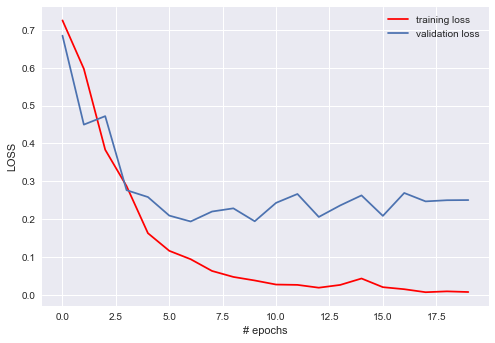

In [26]:
plt.style.use("seaborn")
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('LOSS')
plt.legend()
plt.show()

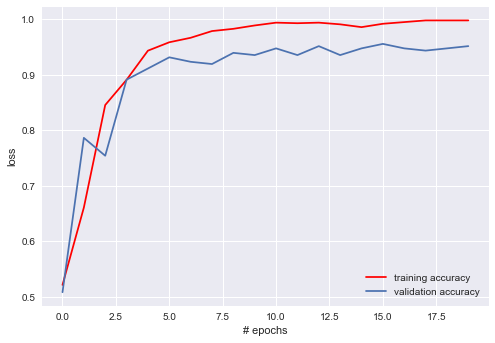

In [27]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [23]:
print(model.evaluate(test_data,test_target))

138/138 [==============================] - 6s 44ms/step
[0.14019694376358952, 0.9637681245803833]


In [29]:
results = model.evaluate(X_test,Y_test)

5/5 [==============================] - 0s 89ms/step - loss: 0.1549 - accuracy: 0.9638


In [32]:
print("Final Loss and Accuracy Respectively on test data->",results)

Final Loss and Accuracy Respectively on test data-> [0.15487971901893616, 0.9637681245803833]


In [33]:
model.save('./final_model')

INFO:tensorflow:Assets written to: ./final_model\assets


In [37]:
temp = model.predict(X_train[0].reshape((1,100,100,1)))

In [40]:
ans = np.argmax(temp,axis=1)
print(ans)

[1]


In [41]:
Y_train[0]

array([0., 1.])